In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

pd.options.display.max_rows = 999

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-11-14/diwali_sales_data.csv",
                   encoding="8859")

In [3]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99


In [4]:
df.nunique()

User_ID             3755
Cust_name           1250
Product_ID          2351
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6584
dtype: int64

In [5]:
# Group by 'product_id' and find the mode for each group
mode_per_product_id = df.groupby('Product_ID')['Product_Category'].agg(lambda x: x.mode().iloc[0]).reset_index()

In [6]:
# Merge the mode_per_product_id DataFrame back to the original DataFrame
df = pd.merge(df, mode_per_product_id, on='Product_ID', how='left', suffixes=('', '_mode'))

In [7]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Product_Category_mode
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,Clothing & Apparel
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,Food
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,Clothing & Apparel
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,Auto
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,Clothing & Apparel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,Office
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,Food
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,Footwear & Shoes
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,Food


In [8]:
# Backfill 'product_category' with the mode values
df['Product_Category'] = df['Product_Category_mode'].combine_first(df['Product_Category'])

In [9]:
# Drop the extra columns used for merging if needed
df = df.drop(['Product_Category_mode'], axis=1)

In [10]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [11]:
customer_dim = df[["User_ID", 
                   "Cust_name", 
                   "Gender", 
                   "Age", 
                   "Marital_Status", 
                   "Occupation"
                   ]].drop_duplicates().reset_index(drop=True)

In [12]:
age_dim = df[["Age", "Age Group"]].drop_duplicates().reset_index(drop=True)

In [13]:
location_dim = df[["State", "Zone"]].drop_duplicates().reset_index(drop=True)

In [14]:
product_dim = df[["Product_ID", "Product_Category"]].drop_duplicates().reset_index(drop=True)

In [15]:
fact_table = df[["User_ID", "Product_ID", "Amount", "Orders"]].drop_duplicates().reset_index(drop=True)

In [16]:
fact_table["Sale_ID"] = fact_table.index

In [17]:
output = {
    "fact_table": fact_table.to_dict(orient="dict"),
    "customer_dim": customer_dim.to_dict(orient="dict"),
    "age_dim": age_dim.to_dict(orient="dict"),
    "location_dim": location_dim.to_dict(orient="dict"),
    "product_dim": product_dim.to_dict(orient="dict"),
}

### Which gender and at what age had more orders

In [4]:
age_gender = df.groupby(["Gender", "Age Group"])["Orders"].agg(["count"]).reset_index()

<Axes: xlabel='Age Group', ylabel='count'>

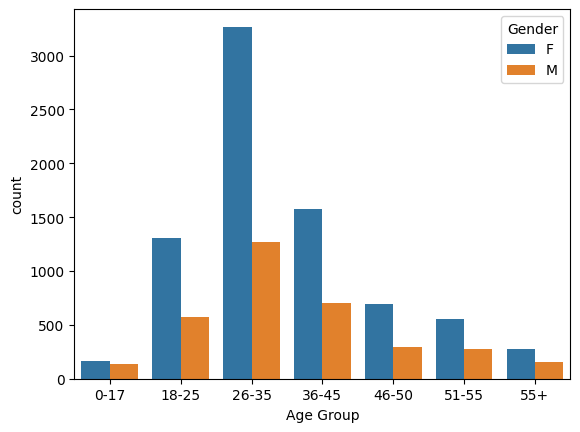

In [5]:
sns.barplot(x="Age Group", y="count", hue="Gender", data=age_gender)

### and how does that look in amount spent

In [6]:
age_gender_amt = df.groupby(["Gender", "Age Group"])["Amount"].agg(["sum"]).reset_index()

<Axes: xlabel='Age Group', ylabel='sum'>

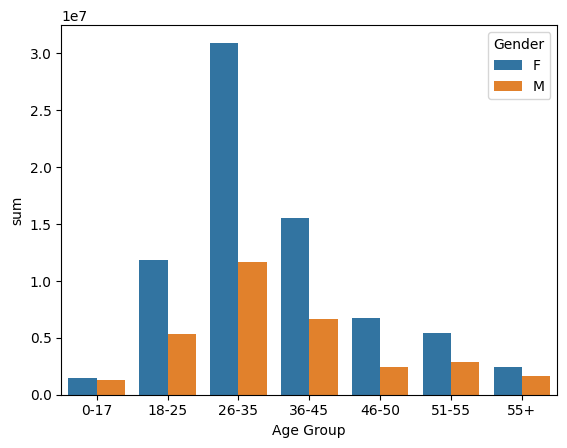

In [7]:
sns.barplot(x="Age Group", y="sum", hue="Gender", data=age_gender_amt)

### converted to average spending

In [10]:
age_gender["average_spend"] = age_gender_amt["sum"]/age_gender["count"]

In [11]:
age_gender.head()

,Gender,Age Group,count,average_spend
0,F,0-17,162,8897.586420
1,F,18-25,1305,9108.814559
2,F,26-35,3268,9469.290067
3,F,36-45,1580,9810.188918
4,F,46-50,696,9688.783046


<Axes: xlabel='Age Group', ylabel='average_spend'>

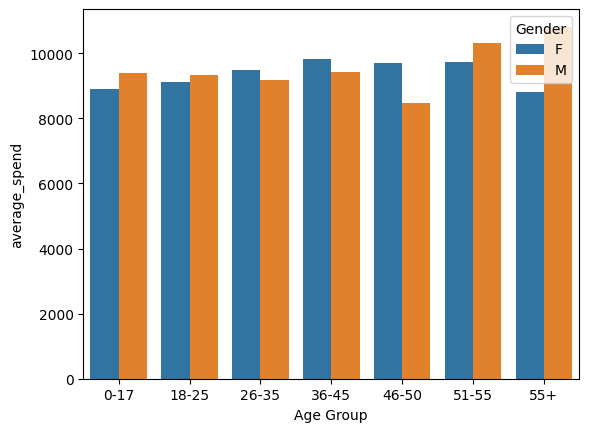

In [12]:
sns.barplot(x="Age Group", y="average_spend", hue="Gender", data=age_gender)

### Orders and amount spent by each state

In [13]:
state_spend = df.groupby(["State"])["Orders"].agg("sum").reset_index()

/tmp/ipykernel_28824/4249036981.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Orders", y="State", data=state_spend, palette="pastel")


<Axes: xlabel='Orders', ylabel='State'>

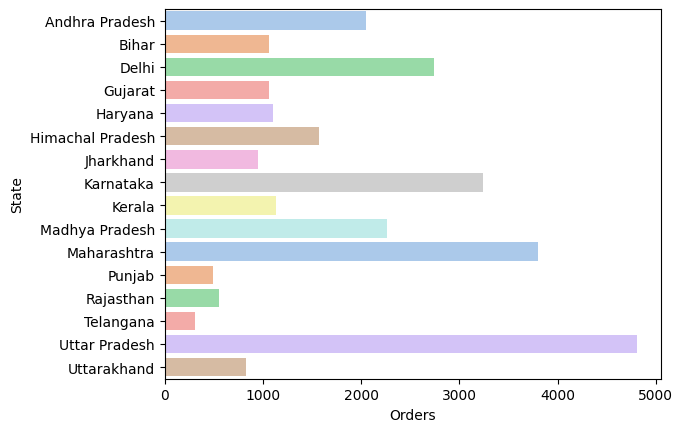

In [32]:
sns.barplot(x="Orders", y="State", data=state_spend, palette="pastel")